# Library

In [2]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

# simple data

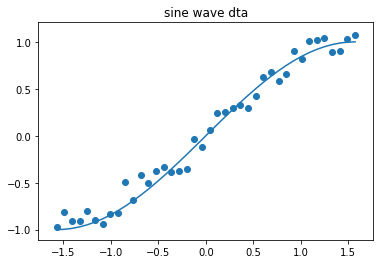

In [7]:
plt.figure()

# true data

N = 40
X = np.linspace(-np.pi/2, np.pi/2, N).reshape(N, 1) # 40 x 1
y = np.sin(X)
plt.plot(X, y)

#  add noise
y += 0.1*np.random.randn(N, 1)

plt.scatter(X, y)
plt.title("sine wave dta")
plt.show()

In [13]:
n_feature = 2
PHI = np.ones(X.shape[0]).reshape(-1, 1) # 40 x 1

for i in range (1, n_feature):
    PHI = np.concatenate((PHI, np.power(X, i)), axis=1)
print('PHI.shape', PHI.shape) # 40 x 2
print('PHI[:3]\n', PHI[:3])

#shuffle
idx = np.random.permutation(N)
shuffle_x = X[idx]
shuffle_PHI = PHI[idx]
shuffle_y = y[idx]

PHI.shape (40, 2)
PHI[:3]
 [[ 1.         -1.57079633]
 [ 1.         -1.49024267]
 [ 1.         -1.40968901]]


# split train / test dataset

In [21]:
n = N - 20

# train data
X_train = shuffle_x[:n]
PHI_train = shuffle_PHI[:n]
y_train = shuffle_y[:n]

print(PHI_train)
print(PHI_train.shape)

#test data
X_test = shuffle_x[:]
PHI_test = shuffle_PHI[:]
y_test = shuffle_y[:]

print(PHI_test)
print(PHI_test.shape)


[[ 1.          0.2819378 ]
 [ 1.          0.92636706]
 [ 1.          1.40968901]
 [ 1.          0.04027683]
 [ 1.         -1.40968901]
 [ 1.          0.60415243]
 [ 1.         -1.49024267]
 [ 1.         -0.12083049]
 [ 1.          0.20138414]
 [ 1.          0.76525975]
 [ 1.          1.08747438]
 [ 1.         -0.20138414]
 [ 1.         -0.92636706]
 [ 1.         -1.08747438]
 [ 1.          0.12083049]
 [ 1.         -0.44304512]
 [ 1.          1.57079633]
 [ 1.         -0.2819378 ]
 [ 1.         -1.16802804]
 [ 1.          1.00692072]]
(20, 2)
[[ 1.          0.2819378 ]
 [ 1.          0.92636706]
 [ 1.          1.40968901]
 [ 1.          0.04027683]
 [ 1.         -1.40968901]
 [ 1.          0.60415243]
 [ 1.         -1.49024267]
 [ 1.         -0.12083049]
 [ 1.          0.20138414]
 [ 1.          0.76525975]
 [ 1.          1.08747438]
 [ 1.         -0.20138414]
 [ 1.         -0.92636706]
 [ 1.         -1.08747438]
 [ 1.          0.12083049]
 [ 1.         -0.44304512]
 [ 1.          1.57

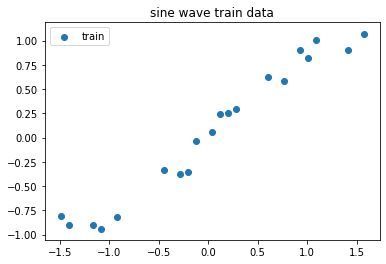

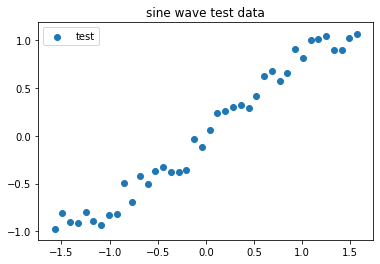

In [23]:
#plot
plt.figure()
plt.scatter(X_train, y_train, label='train')
plt.legend()
plt.title('sine wave train data')
plt.show()
plt.figure()
plt.scatter(X_test, y_test, label='test')
plt.legend()
plt.title('sine wave test data')
plt.show()

# Linear regression (formula)

In [26]:
# compute W_ with PHI_train.

W_ = np.linalg.inv(PHI_train.T @ PHI_train) @ PHI_train.T @ y_train
print('[b, W] = W_')
print('W_shape: ', W_.shape)


print('W_ \n', W_)

[b, W] = W_
W_shape:  (2, 1)
W_ 
 [[0.03187617]
 [0.74418946]]


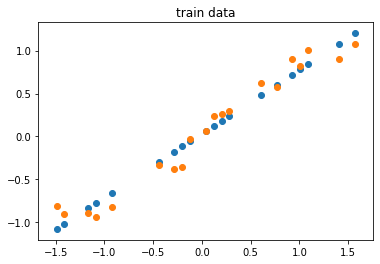

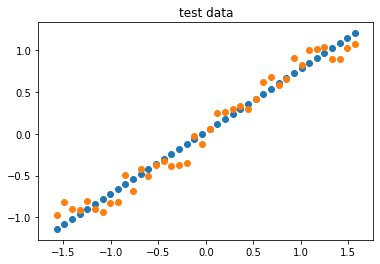

In [27]:
plt.figure()
plt.scatter(X_train, PHI_train @ W_, label='train')
plt.scatter(X_train, y_train, label='target')
plt.title('train data')

plt.show()
plt.figure()
plt.scatter(X_test, PHI_test @ W_, label='test')
plt.scatter(X_test, y_test, label='target')
plt.title('test data')
plt.show()

# Linear regression (formula)
## method 2: compute W and b with sklearn library

In [30]:
import scikitlearn

ModuleNotFoundError: No module named 'scikitlearn'

In [32]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

print('b: ', reg.intercept_)
print("W: ", reg.coef_)

b:  [0.03187617]
W:  [[0.74418946]]


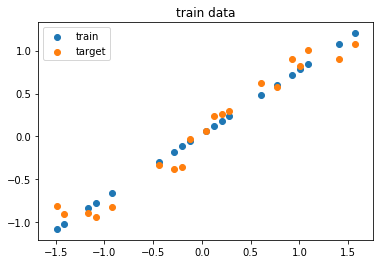

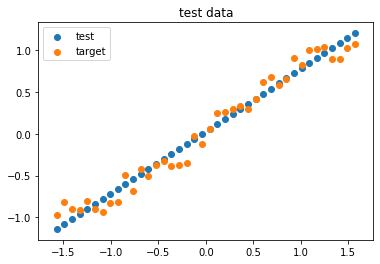

In [33]:
plt.figure()
plt.scatter(X_train, reg.predict(X_train), label='train')
plt.scatter(X_train, y_train, label='target')
plt.legend()
plt.title('train data')
plt.show()

plt.show()
plt.figure()
plt.scatter(X_test, reg.predict(X_test), label='test')
plt.scatter(X_test, y_test, label='target')
plt.legend()
plt.title('test data')
plt.show()

# Linear regression (formula)
## method 2: compute W and b with tensorflow library (basic)

In [39]:
tf.reset_default_graph()
tf_PHI = tf.placeholder(tf.float32, [None, n_feature])
tf_y = tf.placeholder(tf.float32, [None, 1])

# train with PHI_train, so w shape is [n_feature, 1]
w = tf.get_variable('w', [n_feature, 1])
# train without bias. (PHI_train term have 1, have bias already)
y_pred = tf_PHI @ w

loss = tf.reduce_mean(tf.reduce_sum(tf.pow(tf_y - y_pred, 2), axis = 1))
optimizer = tf.train.GradientDescentOptimizer(1e-1).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range (100):
        sess.run(optimizer, feed_dict = {tf_PHI: PHI_train, tf_y:y_train})
        
    print('[b, W]: ', sess.run(w))
    y_train_pred = sess.run(y_pred, feed_dict = {tf_PHI:PHI_train})
    y_test_pred = sess.run(y_pred, feed_dict = {tf_PHI:PHI_test})


[b, W]:  [[0.03187616]
 [0.74418956]]


In [40]:
tf.reset_default_graph()
tf_PHI = tf.placeholder(tf.float32, [None, n_feature])
tf_y = tf.placeholder(tf.float32, [None, 1])

y_pred = tf.layers.dense(tf_PHI, 1)

loss = tf.reduce_mean(tf.reduce_sum(tf.pow(tf_y - y_pred, 2), axis = 1))
optimizer = tf.train.GradientDescentOptimizer(1e-1).minimize(loss)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range (100):
        sess.run(optimizer, feed_dict = {tf_PHI: PHI_train, tf_y:y_train})
        
    y_train_pred = sess.run(y_pred, feed_dict = {tf_PHI:PHI_train})
    y_test_pred = sess.run(y_pred, feed_dict = {tf_PHI:PHI_test})


W0820 15:25:30.421005 140334854354688 deprecation.py:323] From <ipython-input-40-364f4d9507f9>:5: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dense instead.
